## 의사결정나무 (Decision Tree)

       (1) 장점
            - 만들어진 모델을 쉽게 시각화하여 이해하기 쉽다
            - 데이터의 스케일(scale)에 영향을 받지 않아서 특성(feature)의 정규화나 표준화 같은 전처리 과정이 필요없다

       (2) 단점
            - 사전 가지치기를 사용함에도 과대적합되는 경향이 있어서 일반화 성능이 좋지 않다



<img src='./imgs/DT.png'>


[예제 ] 붓꽃(Iris) 품종 

- 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 측정하여 품종을 예측한다
- 150개의 데이타에서 3가지 품종(setosa, versicolor, virginica)로 분류한다

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# 1. 데이타 로딩

iris = datasets.load_iris()

# 데이터 key 확인
# print(iris.keys())


In [6]:
# 2. 데이터와 레이블 분리 변수 선언
X = iris['data']

y = iris['target']


# 3. 데이타셋을 분리 ( 학습용:검증용 = 7:3 )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 


In [8]:
# 5. 트리 모델 생성하고 학습하기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [9]:
# 6. 정확도

print('학습 정확도:',model.score(X_train, y_train))
print('테스트 정확도:',model.score(X_test, y_test))


학습 정확도: 0.9821428571428571
테스트 정확도: 0.9736842105263158





---

# 결정트리 시각화

[ 참고 ] graphviz 설치

    - Graphviz 프로그램 연결하는 라이브러리(??)
        > pip install graphviz
        

    - 직접설치 필요
      :  https://graphviz.gitlab.io/_pages/Download/Download_windows.html
      
      (1) 다운받아 직접 설치
           
           > Windows > Stable 2.38 Windows install packages > 10 > release >  graphviz-2.38.msi 다운로드 받아 실행

      (2) chocolatey를 이용하여 설치
      
          [참고] window10에 초코라때 설치
                1- 먼저 Windows PowerShell (관리자)를 실행합니다.
                2- 한줄로 명령 입력 
> Set-ExecutionPolicy Bypass -Scope Process -Force; iex ((New-Object System.Net.WebClient).DownloadString('https://chocolatey.org/install.ps1'))  

                3- 설치 확인
                    > choco -v
                
                4- choco를 이용하여 설치
                    > choco install graphviz
                    
                5- graphviz 설치 확인
                    C:\Program Files\Graphviz
                    

- 환경변수 지정 (소스에서 ) : C:/Program Files/Graphviz/bin/



        import os

        os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


In [10]:
#!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [11]:
# pydotplus 설치
#! pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=dd9c5d274c645d9f8fa2992bae749faca717df3210d37062b25038bfa1c21bcd
  Stored in directory: c:\users\kosmo\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [14]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

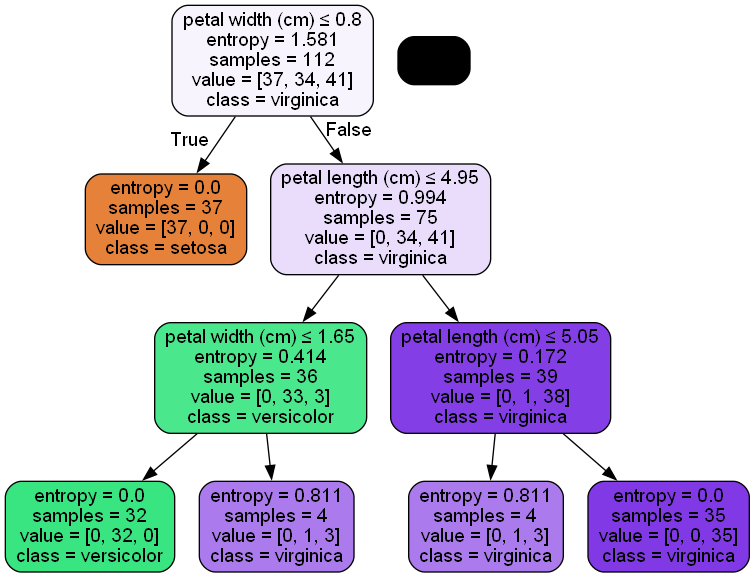

In [16]:
# graphviz의 경로를 환경변수 PATH에 등록
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data = export_graphviz(model, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

        #dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
        #                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


# 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 이미지로 변환
Image(graph.create_png())